## Eletrical Usage

Take the optimal machine learning method for each independant variable:

- Location average income $\rightarrow$ kNN
- Weather $\rightarrow$ Random Forest
    - Rain [mm]
    - Wind speed [km/h]
    - Temperature [°C]
- Time for industrial activity $\rightarrow$ Regression
- Number of High-Rise buildings $\rightarrow$ kNN

Random Forest Regression Results:
Mean Squared Error (MSE): 14.2695
Root Mean Squared Error (RMSE): 3.7775
R-squared (R²): -0.0967

Feature Importance:
Rainfall: 1.0000


/home/jorge_lara_lol/SYNCS-Hackathon-main/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


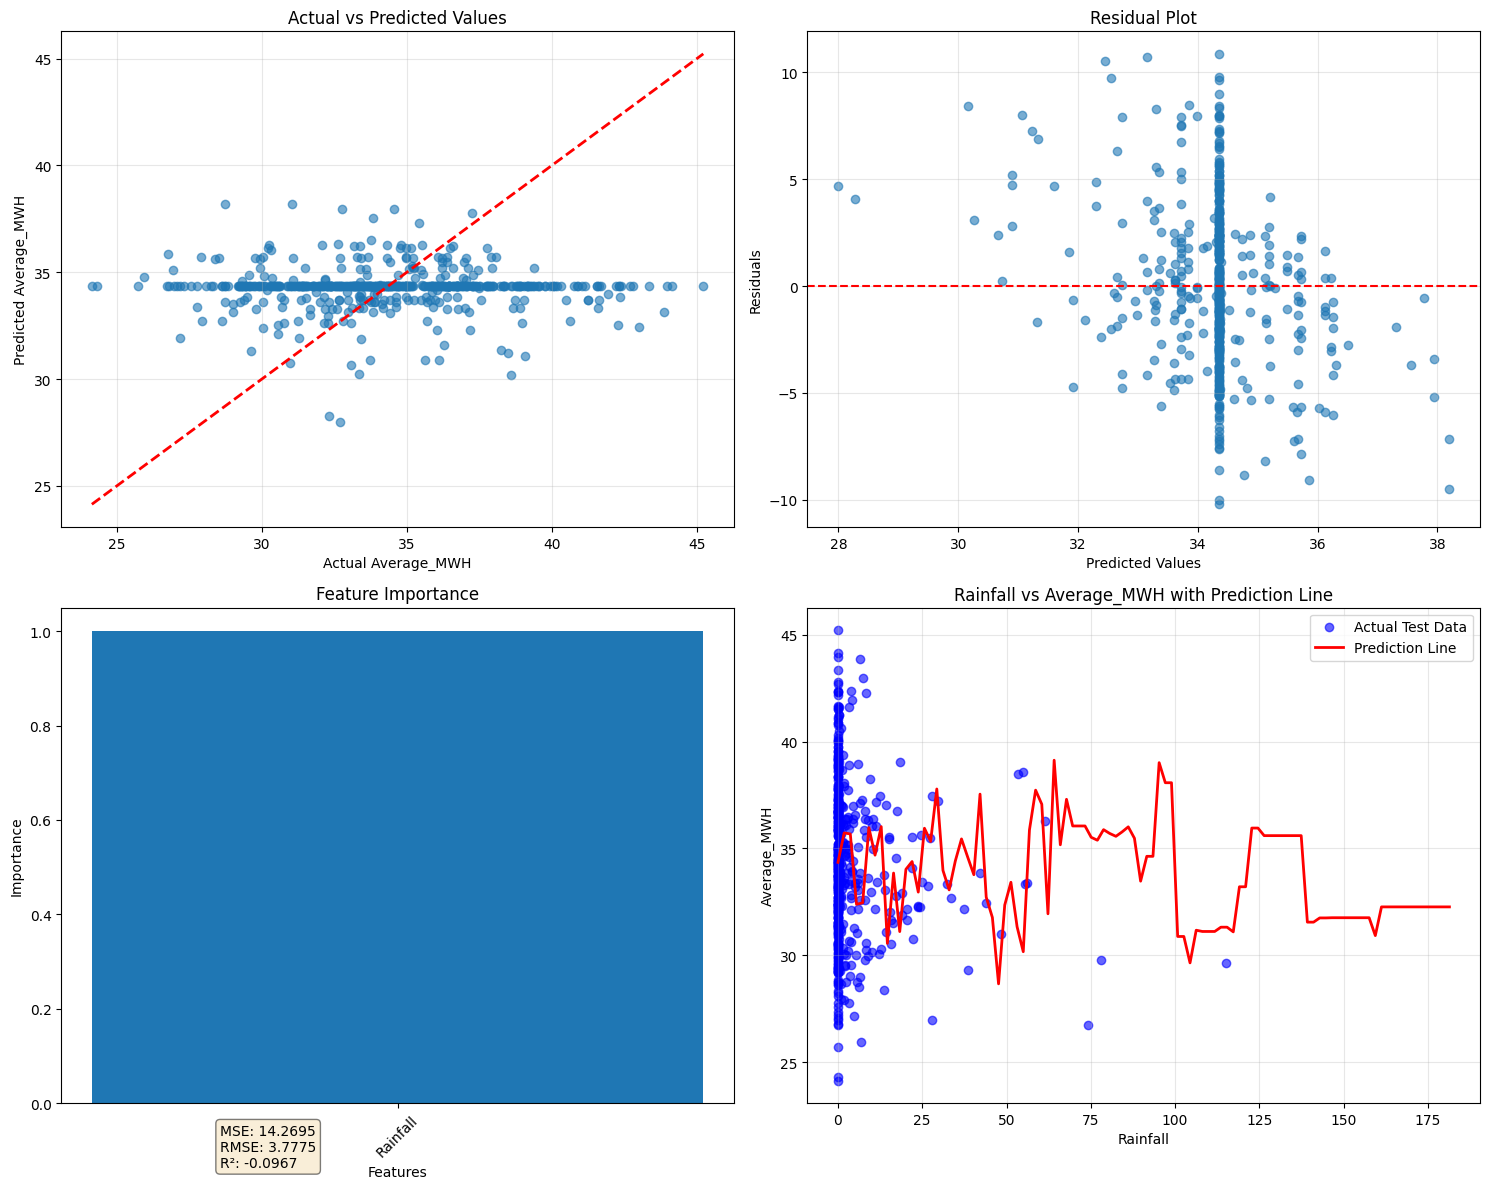


Feature importance from all trees (first 5 trees):
Tree 1: 1.0000
Tree 2: 1.0000
Tree 3: 1.0000
Tree 4: 1.0000
Tree 5: 1.0000


In [14]:
# Power Consumption vs Rainfall Analysis using Random Forest Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv("PreprocessData/elec/Zetland/combined_avg.csv")
df = df.dropna()  # Drop rows with missing values for simplicity

# Prepare the data
X = df[['Rainfall']]  # Independent variable
y = df['Average_MWH']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature importance
feature_importance = rf_model.feature_importances_
print(f"\nFeature Importance:")
print(f"Rainfall: {feature_importance[0]:.4f}")

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of actual vs predicted values
ax1.scatter(y_test, y_pred, alpha=0.6)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Average_MWH')
ax1.set_ylabel('Predicted Average_MWH')
ax1.set_title('Actual vs Predicted Values')
ax1.grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

# 3. Feature importance plot
features = ['Rainfall']
ax3.bar(features, feature_importance)
ax3.set_xlabel('Features')
ax3.set_ylabel('Importance')
ax3.set_title('Feature Importance')
ax3.tick_params(axis='x', rotation=45)

# 4. Prediction line plot (for visualization)
# Create a range of rainfall values for prediction
rainfall_range = np.linspace(X['Rainfall'].min(), X['Rainfall'].max(), 100).reshape(-1, 1)
predictions_range = rf_model.predict(rainfall_range)

# Plot actual data points
ax4.scatter(X_test, y_test, alpha=0.6, label='Actual Test Data', color='blue')
# Plot prediction line
ax4.plot(rainfall_range, predictions_range, 'r-', lw=2, label='Prediction Line')
ax4.set_xlabel('Rainfall')
ax4.set_ylabel('Average_MWH')
ax4.set_title('Rainfall vs Average_MWH with Prediction Line')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add text box with metrics
textstr = f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.15, 0.02, textstr, fontsize=10, verticalalignment='bottom', bbox=props)

plt.tight_layout()
plt.show()

# Additional: Feature importance from all trees (optional)
print("\nFeature importance from all trees (first 5 trees):")
for i, tree in enumerate(rf_model.estimators_[:5]):
    print(f"Tree {i+1}: {tree.feature_importances_[0]:.4f}")